In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data = pd.read_json('sent_an.json')

In [60]:
data

,post_id,post,tokens,date,comm_id,comm,topic,month,negative,neutral,positive,sentiment,tone_score
0,44734671,"Чем один вид выплат отличается от другого, кто...",вид выплата отличаться другой иметь право фина...,2024-01-31,44734701,так переезжай в Москву. Что мешает ? Или кто ...,soc_pol,1,0.203689,0.789712,0.006600,neutral,0.401455
1,44734671,"Чем один вид выплат отличается от другого, кто...",вид выплата отличаться другой иметь право фина...,2024-01-31,44734701,всем россиянам в Москву переезжать? Может над...,soc_pol,1,0.155795,0.838709,0.005496,neutral,0.424850
2,44734671,"Чем один вид выплат отличается от другого, кто...",вид выплата отличаться другой иметь право фина...,2024-01-31,44734777,Comm: Разберитесь с кидаловом на счетчиках вна...,soc_pol,1,0.009979,0.980549,0.009472,neutral,0.499747
3,44734671,"Чем один вид выплат отличается от другого, кто...",вид выплата отличаться другой иметь право фина...,2024-01-31,44734777,"а что мешает самому установить счётчик, а не ...",soc_pol,1,0.244068,0.754479,0.001454,neutral,0.378693
4,44734671,"Чем один вид выплат отличается от другого, кто...",вид выплата отличаться другой иметь право фина...,2024-01-31,44734777,"Я не электрик,да и счетчики на воду тоже собс...",soc_pol,1,0.453676,0.526596,0.019728,neutral,0.283026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731247,46803641,Митингующие в Тбилиси забросали пиротехникой и...,митинговать тбилиси забросать пиротехника горе...,2024-12-01,46804154,"Comm: От терпилы. На раз терпят, значит им нра...",protests,12,0.018463,0.198155,0.783382,positive,0.882460
731248,46803641,Митингующие в Тбилиси забросали пиротехникой и...,митинговать тбилиси забросать пиротехника горе...,2024-12-01,46804229,Comm: видно грузинам очень хочется жить так же...,protests,12,0.283129,0.642132,0.074739,neutral,0.395805
731249,46803641,Митингующие в Тбилиси забросали пиротехникой и...,митинговать тбилиси забросать пиротехника горе...,2024-12-01,46805464,Comm: Батька такой мойдан сша моментально разо...,protests,12,0.960569,0.036869,0.002562,negative,0.020996
731250,46803641,Митингующие в Тбилиси забросали пиротехникой и...,митинговать тбилиси забросать пиротехника горе...,2024-12-01,46806065,Comm: Чачи нахлебались и феерверки пускают)),protests,12,0.056448,0.250551,0.693002,positive,0.818277


In [122]:
kw = {'usa': ['трамп', 'байден', 'харрис', 'сша', 'вашингтон'],
     'middle_east': ['израиль', 'иран','хамас','цахал','сирия', 'ливан', 'хезболл', 'нетаньяху', 'раиси'],
     'soc_pol': ['госдума', 'законопроект', 'закон' 'налог', 'мигрант', 'иноагент', 'ставка', 'прожиточный', 'пропаганда', 'ребенок', 'центробанк','ипотека'],
     'economics': ['долг', 'задолженность''закупка', 'доллар','евро','рубль','миллиард', 'актив', 'поставка','миллион'],
     'protests': ['протест','акция','слезоточивый','отставка','вооруженный', 'силовик','ограждение','грузия'],
     'emergency': ['авария','вода','пожар','спасатели','мертвый','крушение', 'дтп','смерть','пострадать','циклон'],}

In [128]:
def keep_post(post, topic, keywords_dict):
    words = keywords_dict.get(topic)
    if words is None:
        return True
    return any(word.lower() in post.lower() for word in words)

filtered_df = data[data.apply(lambda row: keep_post(row['post'], row['topic'], kw), axis=1)]

In [134]:
filtered_df.to_json('all_filtered.json', orient='records', force_ascii=False, indent=4)

In [15]:
filtered_df['sentiment'].value_counts()

sentiment
neutral     248275
negative    134025
positive     69946
Name: count, dtype: int64

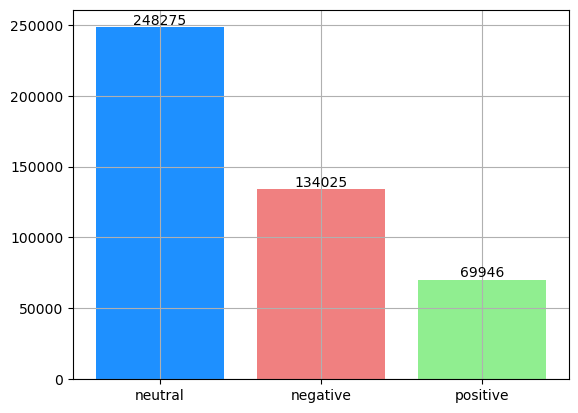

In [33]:
sentiment = filtered_df['sentiment'].value_counts().index
counts = filtered_df['sentiment'].value_counts().values

bars = plt.bar(sentiment, counts, width=0.8, color=['dodgerblue', 'lightcoral', 'lightgreen'])
for bar, count in zip(bars, counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                   
        f'{count}',                       
        ha='center',                       
        va='bottom'                        
    )
plt.xticks(rotation=0)
plt.grid();